Simulating Van der Pol oscillator with μ = 1.5
Running simulation for initial condition 1: [0.1, 0.1]
Running simulation for initial condition 2: [2.5, 0.0]
Running simulation for initial condition 3: [0.0, 2.5]
Running simulation for initial condition 4: [1.0, 1.0]
Running simulation for initial condition 5: [-2.0, -0.5]


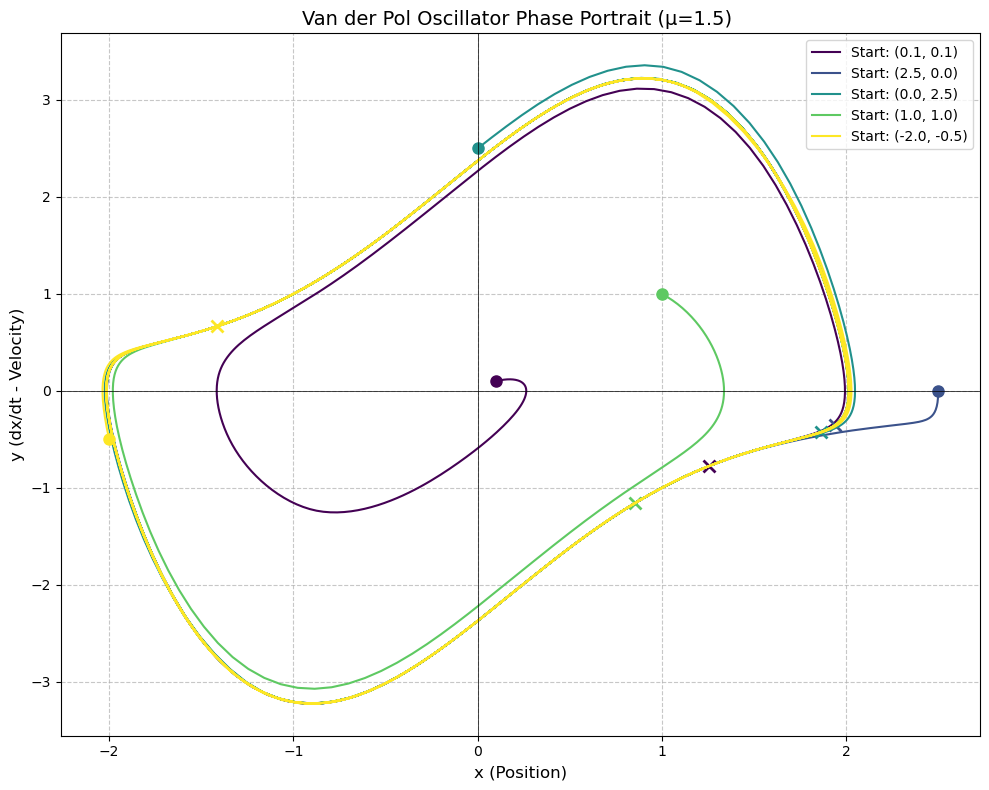

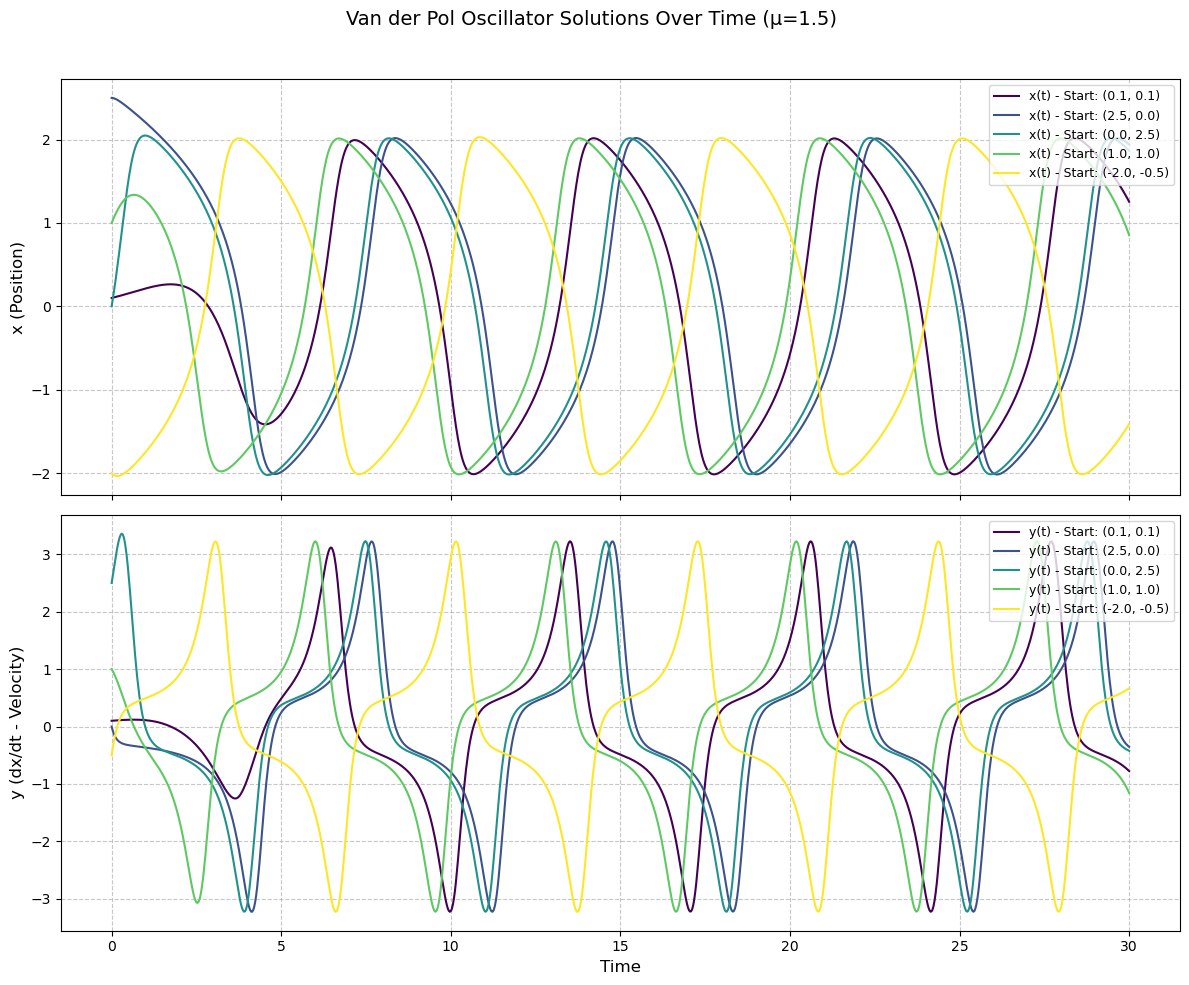

Saving animation to van_der_pol_animation.gif ... This might take a moment.
Animation saved to van_der_pol_animation.gif


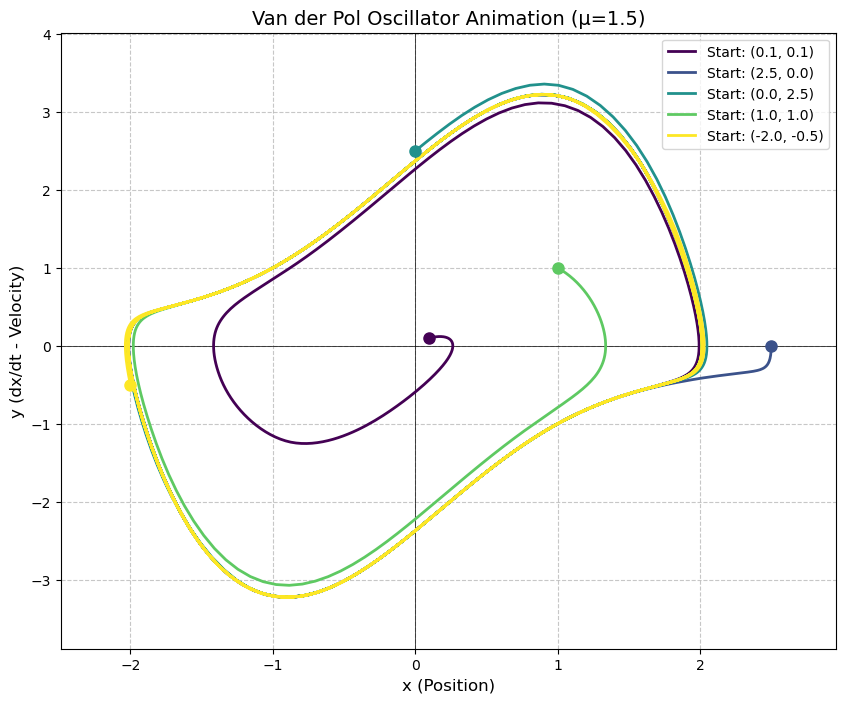


Script finished.


In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Van der Pol oscillator parameter
MU = 1.5  # Damping coefficient; mu > 0 for limit cycle

def van_der_pol_system(t, state, mu):
    """
    Defines the Van der Pol oscillator system of differential equations.
    The system is:
    dx/dt = y
    dy/dt = mu * (1 - x^2) * y - x

    Args:
        t (float): Current time (required by solve_ivp).
        state (tuple or list): A list or tuple [x, y] where y = dx/dt.
        mu (float): The damping coefficient of the oscillator.

    Returns:
        list: A list [dx/dt, dy/dt].
    """
    x, y = state
    dx_dt = y
    dy_dt = mu * (1 - x**2) * y - x
    return [dx_dt, dy_dt]

def simulate_van_der_pol(initial_state, t_span, t_eval_points, mu=MU):
    """
    Simulates the Van der Pol oscillator.

    Args:
        initial_state (list): The initial state [x0, y0 (dx/dt at t0)].
        t_span (tuple): A tuple (t_start, t_end) for the integration time interval.
        t_eval_points (int): Number of points at which to store the computed solution.
        mu (float, optional): Damping coefficient. Defaults to MU.

    Returns:
        scipy.integrate.OdeResult: Solution object.
    """
    t_eval = np.linspace(t_span[0], t_span[1], t_eval_points)
    solution = solve_ivp(
        fun=lambda t, state: van_der_pol_system(t, state, mu),
        t_span=t_span,
        y0=initial_state,
        method='RK45',
        t_eval=t_eval,
        dense_output=True
    )
    return solution

def plot_phase_portraits(solutions, initial_conditions, mu, title_suffix=""):
    """
    Plots the phase portraits (y vs x) for multiple solutions.

    Args:
        solutions (list): List of solution objects from solve_ivp.
        initial_conditions (list): List of initial_conditions corresponding to solutions.
        mu (float): Damping coefficient.
        title_suffix (str, optional): Suffix for the plot title.
    """
    plt.figure(figsize=(10, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(solutions))) # Use a colormap

    for i, sol in enumerate(solutions):
        x_vals = sol.y[0]
        y_vals = sol.y[1]
        plt.plot(x_vals, y_vals, lw=1.5, label=f'Start: ({initial_conditions[i][0]:.1f}, {initial_conditions[i][1]:.1f})', color=colors[i])
        plt.plot(x_vals[0], y_vals[0], 'o', color=colors[i], markersize=8) # Mark start
        plt.plot(x_vals[-1], y_vals[-1], 'x', color=colors[i], markersize=8, markeredgewidth=2) # Mark end


    plt.xlabel("x (Position)", fontsize=12)
    plt.ylabel("y (dx/dt - Velocity)", fontsize=12)
    plt.title(f"Van der Pol Oscillator Phase Portrait (μ={mu}) {title_suffix}", fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.tight_layout()
    plt.show()

def plot_solutions_over_time(solutions, initial_conditions, mu, title_suffix=""):
    """
    Plots x(t) and y(t) for multiple solutions.

    Args:
        solutions (list): List of solution objects from solve_ivp.
        initial_conditions (list): List of initial_conditions corresponding to solutions.
        mu (float): Damping coefficient.
        title_suffix (str, optional): Suffix for the plot title.
    """
    fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    colors = plt.cm.viridis(np.linspace(0, 1, len(solutions)))

    for i, sol in enumerate(solutions):
        time_points = sol.t
        x_vals = sol.y[0]
        y_vals = sol.y[1]

        axs[0].plot(time_points, x_vals, label=f'x(t) - Start: ({initial_conditions[i][0]:.1f}, {initial_conditions[i][1]:.1f})', color=colors[i], lw=1.5)
        axs[1].plot(time_points, y_vals, label=f'y(t) - Start: ({initial_conditions[i][0]:.1f}, {initial_conditions[i][1]:.1f})', color=colors[i], lw=1.5)

    axs[0].set_ylabel("x (Position)", fontsize=12)
    axs[0].grid(True, linestyle='--', alpha=0.7)
    axs[0].legend(fontsize=9, loc='upper right')

    axs[1].set_ylabel("y (dx/dt - Velocity)", fontsize=12)
    axs[1].set_xlabel("Time", fontsize=12)
    axs[1].grid(True, linestyle='--', alpha=0.7)
    axs[1].legend(fontsize=9, loc='upper right')

    fig.suptitle(f"Van der Pol Oscillator Solutions Over Time (μ={mu}) {title_suffix}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
    plt.show()

def animate_phase_portraits(solutions, initial_conditions, t_span, mu, filename="van_der_pol_animation.gif"):
    """
    Animates the evolution of multiple trajectories in the phase plane.

    Args:
        solutions (list): List of solution objects.
        initial_conditions (list): List of initial conditions.
        t_span (tuple): (t_start, t_end).
        mu (float): Damping coefficient.
        filename (str, optional): Filename to save the animation.
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(solutions)))
    
    # Determine plot limits dynamically
    all_x = np.concatenate([sol.y[0] for sol in solutions])
    all_y = np.concatenate([sol.y[1] for sol in solutions])
    x_min, x_max = np.min(all_x), np.max(all_x)
    y_min, y_max = np.min(all_y), np.max(all_y)
    margin_x = (x_max - x_min) * 0.1
    margin_y = (y_max - y_min) * 0.1

    ax.set_xlim(x_min - margin_x, x_max + margin_x)
    ax.set_ylim(y_min - margin_y, y_max + margin_y)

    ax.set_xlabel("x (Position)", fontsize=12)
    ax.set_ylabel("y (dx/dt - Velocity)", fontsize=12)
    ax.set_title(f"Van der Pol Oscillator Animation (μ={mu})", fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)

    lines = []
    for i in range(len(solutions)):
        line, = ax.plot([], [], lw=2, color=colors[i], label=f'Start: ({initial_conditions[i][0]:.1f}, {initial_conditions[i][1]:.1f})')
        lines.append(line)
    
    # Add starting points markers that stay
    for i, ic in enumerate(initial_conditions):
        ax.plot(ic[0], ic[1], 'o', color=colors[i], markersize=8)

    ax.legend(fontsize=10)

    # The number of frames in the animation should match the number of time points in the solution
    # Assuming all solutions have the same number of time points (t_eval_points)
    num_frames = len(solutions[0].t)

    def init():
        for line in lines:
            line.set_data([], [])
        return lines

    def update(frame):
        for i, line in enumerate(lines):
            # Update data up to the current frame
            line.set_data(solutions[i].y[0, :frame+1], solutions[i].y[1, :frame+1])
        return lines

    # Reduce interval for smoother animation, but it will take longer to generate
    # frames can be adjusted too, e.g., every other point for faster animation
    ani = animation.FuncAnimation(fig, update, frames=num_frames,
                                  init_func=init, blit=True, interval=30) # interval in ms

    try:
        print(f"Saving animation to {filename} ... This might take a moment.")
        ani.save(filename, writer='pillow', fps=30) # Using pillow for GIF
        print(f"Animation saved to {filename}")
    except Exception as e:
        print(f"Error saving animation: {e}")
        print("Make sure you have 'Pillow' installed (pip install Pillow).")
        print("Alternatively, try a different writer or ensure ffmpeg is in your PATH for mp4.")

    plt.show() # Show the plot window after animation setup (optional)


if __name__ == "__main__":
    # --- Simulation Parameters ---
    MU_SIM = 1.5  # Damping coefficient for this simulation run

    # Five different initial conditions [x0, y0 (dx/dt at t0)]
    initial_conditions_list = [
        [0.1, 0.1],    # Near origin
        [2.5, 0.0],    # Outside limit cycle, on x-axis
        [0.0, 2.5],    # Outside limit cycle, on y-axis
        [1.0, 1.0],    # Inside limit cycle
        [-2.0, -0.5]   # Another point outside
    ]

    # Time span for the simulation
    t_start = 0
    t_end = 30  # Increased time to ensure convergence to limit cycle
    t_span = (t_start, t_end)

    # Number of time points to evaluate
    t_eval_points = 1000 # More points for smoother animation

    # --- Run Simulations ---
    solutions_list = []
    print(f"Simulating Van der Pol oscillator with μ = {MU_SIM}")
    for i, ic in enumerate(initial_conditions_list):
        print(f"Running simulation for initial condition {i+1}: {ic}")
        sol = simulate_van_der_pol(ic, t_span, t_eval_points, mu=MU_SIM)
        solutions_list.append(sol)

    # --- Plotting ---
    # Plot phase portraits for all solutions on one graph
    plot_phase_portraits(solutions_list, initial_conditions_list, mu=MU_SIM)

    # Plot solutions (x(t) and y(t)) over time
    plot_solutions_over_time(solutions_list, initial_conditions_list, mu=MU_SIM)

    # --- Animation ---
    # Animate the phase portraits
    # Note: Animation can take some time to generate and save.
    animate_phase_portraits(solutions_list, initial_conditions_list, t_span, mu=MU_SIM, filename="van_der_pol_animation.gif")

    print("\nScript finished.")
